<a href="https://colab.research.google.com/github/KateT840/Lab_moderna_con_Emma/blob/main/Lab4/Laboratorio_zeeman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import os
from google.colab import drive
import matplotlib.ticker as ticker
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
from matplotlib.ticker import ScalarFormatter
from sklearn.linear_model import LinearRegression

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [10]:
os.chdir("/content/drive/MyDrive/Laboratorio_moderna/")
!ls


'Ajuste de Balmer: Hidrógeno.png'       Lab1   Lab4
 espectros.png			        Lab2   Mercurio.png
'Interpolación cuadrática para H.png'   Lab3   Sodio.png


In [12]:
file_1 = '/content/drive/MyDrive/Laboratorio_moderna/Lab4/calib_near_7s.txt'
file_2 = '/content/drive/MyDrive/Laboratorio_moderna/Lab4/calib_necd_7s.txt'
file_3 = '/content/drive/MyDrive/Laboratorio_moderna/Lab4/cd_conb_paral_5s.txt'
file_4 = '/content/drive/MyDrive/Laboratorio_moderna/Lab4/cd_conb_perp_5s.txt'
file_5= '/content/drive/MyDrive/Laboratorio_moderna/Lab4/ne_conb_paral_5s.txt'
file_6= '/content/drive/MyDrive/Laboratorio_moderna/Lab4/ne_conb_perp_5s.txt'
file_1, file_2, file_3, file_4, file_5, file_6

('/content/drive/MyDrive/Laboratorio_moderna/Lab4/calib_near_7s.txt',
 '/content/drive/MyDrive/Laboratorio_moderna/Lab4/calib_necd_7s.txt',
 '/content/drive/MyDrive/Laboratorio_moderna/Lab4/cd_conb_paral_5s.txt',
 '/content/drive/MyDrive/Laboratorio_moderna/Lab4/cd_conb_perp_5s.txt',
 '/content/drive/MyDrive/Laboratorio_moderna/Lab4/ne_conb_paral_5s.txt',
 '/content/drive/MyDrive/Laboratorio_moderna/Lab4/ne_conb_perp_5s.txt')

<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-803951713.py:7: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(file_1, sep="\s+", header=None, names=["x","y"])


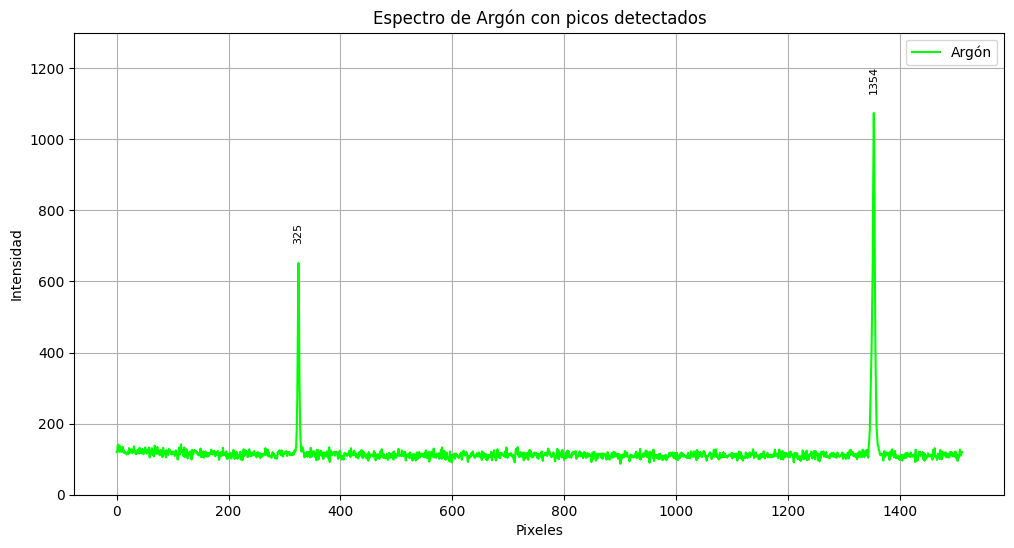

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Leer el archivo
file_1 = '/content/drive/MyDrive/Laboratorio_moderna/Lab4/calib_near_7s.txt'
df = pd.read_csv(file_1, sep="\s+", header=None, names=["x","y"])

# Detectar picos con altura mínima de 400
peaks, _ = find_peaks(df["y"], height=400)

# Graficar
plt.figure(figsize=(12,6))
plt.plot(df["x"], df["y"], label="Argón", color="lime")

# Anotar todos los picos que superan 400
for peak in peaks:
    plt.annotate(f'{int(df["x"][peak])}',
                 (df["x"][peak], df["y"][peak]),
                 textcoords="offset points", xytext=(0,15),
                 ha='center', fontsize=8, color='black', rotation=90)

plt.xlabel("Pixeles")
plt.ylabel("Intensidad")
plt.title("Espectro de Argón con picos detectados")
plt.legend()
plt.grid(True)
plt.ylim(0, 1300)
plt.savefig("Neoncal.png", dpi=300)
plt.show()


In [54]:
from google.colab import files
files.download("Neoncal.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [55]:

pico1_pixel = 325
pico2_pixel = 1354

# Calcular Δλ y Δpixels
delta_lambda = 725.5485 - 723.3606   # nm
delta_pixels = pico2_pixel - pico1_pixel

# Calcular r
r = delta_lambda / delta_pixels

print(f"Píxel 1 nm: {pico1_pixel}")
print(f"Píxel 2 nm: {pico2_pixel}")
print(f"Δλ = {delta_lambda} nm, Δpixels = {delta_pixels}")
print(f"r = {r:.4f} nm/píxel")


Píxel 1 nm: 325
Píxel 2 nm: 1354
Δλ = 2.1879000000000133 nm, Δpixels = 1029
r = 0.0021 nm/píxel


<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-3853132439.py:2: SyntaxWarning: invalid escape sequence '\s'
  df_2 = pd.read_csv(file_2, sep="\s+", header=None, names=["x","y"])


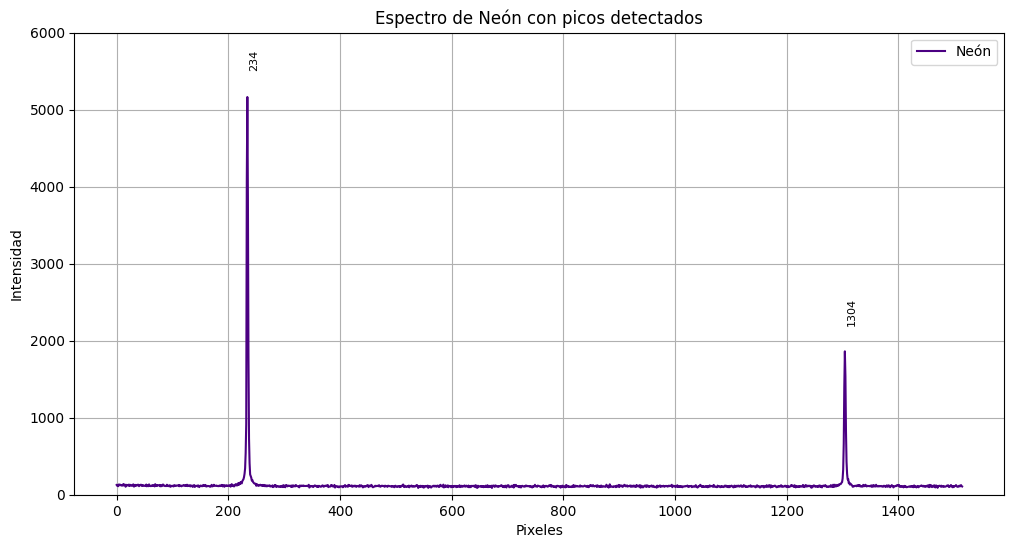

In [65]:
# Leer el archivo
df_2 = pd.read_csv(file_2, sep="\s+", header=None, names=["x","y"])

# Detectar picos con altura mínima de 400
peaks, _ = find_peaks(df_2["y"], height=400)

# Graficar
plt.figure(figsize=(12,6))
plt.plot(df_2["x"], df_2["y"], label="Neón", color="indigo")

# Anotar todos los picos que superan 400
for peak in peaks:
    # Desplazamiento: 15 puntos arriba y 5 a la derecha
    plt.annotate(f'{int(df_2["x"][peak])}',
                 (df_2["x"][peak], df_2["y"][peak]),
                 textcoords="offset points", xytext=(5,20),
                 ha='center', fontsize=8, color='black', rotation=90)

plt.xlabel("Pixeles")
plt.ylabel("Intensidad")
plt.title("Espectro de Neón con picos detectados")
plt.legend()
plt.grid(True)
plt.ylim(0, 6000)
#plt.savefig("Neoncali.png", dpi=300)
plt.show()


In [66]:
#from google.colab import files
#files.download("Neoncali.png")

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-413817458.py:2: SyntaxWarning: invalid escape sequence '\s'
  df_3 = pd.read_csv(file_3, sep="\s+", header=None, names=["x","y"])


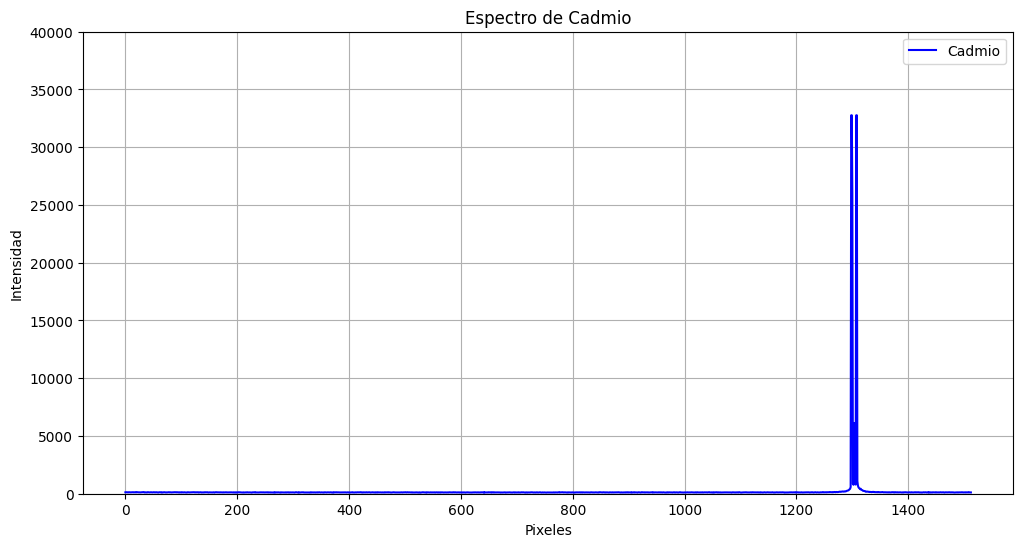

In [82]:
# Leer archivo
df_3 = pd.read_csv(file_3, sep="\s+", header=None, names=["x","y"])

# Graficar
plt.figure(figsize=(12,6))
plt.plot(df_3["x"], df_3["y"], label="Cadmio", color="blue")

plt.xlabel("Pixeles")
plt.ylabel("Intensidad")
plt.title("Espectro de Cadmio")
plt.legend()
plt.grid(True)
plt.ylim(0, 40000)
plt.show()


<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-3778129358.py:2: SyntaxWarning: invalid escape sequence '\s'
  df_3 = pd.read_csv(file_3, sep="\s+", header=None, names=["x","y"])


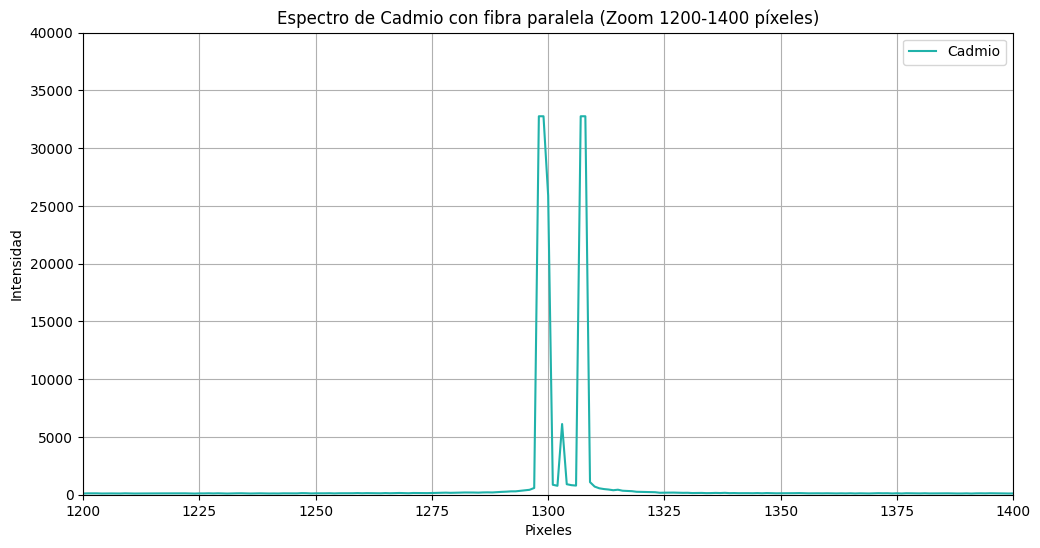

In [83]:
# Leer archivo
df_3 = pd.read_csv(file_3, sep="\s+", header=None, names=["x","y"])

# Graficar
plt.figure(figsize=(12,6))
plt.plot(df_3["x"], df_3["y"], label="Cadmio", color="lightseagreen")

plt.xlabel("Pixeles")
plt.ylabel("Intensidad")
plt.title("Espectro de Cadmio con fibra paralela (Zoom 1200-1400 píxeles)")
plt.legend()
plt.grid(True)
plt.ylim(0, 40000)       # Mantener límite de intensidad
plt.xlim(1200, 1400)    # Zoom en los píxeles 1200 a 1400
plt.savefig("Cadmio_zoom.png", dpi=300)
plt.show()


In [84]:
from google.colab import files
files.download("Cadmio_zoom.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>